In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import skimage as ski
from skimage import io
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

import cv2 

# Type Hint Libraries
from typing import Optional, Tuple, Union, TypeVar, List
import numpy.typing as npt
import matplotlib.figure

In [2]:
os.getcwd()

'C:\\Users\\rzamb\\Documents\\UMD\\640_Computer_Vision\\HW\\hw3\\Zambrano_Ricardo_ASN3_py'

In [3]:
PATH_POM_POKO_1 = '..\Zambrano_Ricardo_ASN3_py\pom_poko_1.jpg'
PATH_POM_POKO_2 = '..\Zambrano_Ricardo_ASN3_py\pom_poko_2.jpg'
PATH_ORCHID_1 = '..\Zambrano_Ricardo_ASN3_py\orchids_1.jpg'
PATH_ORCHID_2 = '..\Zambrano_Ricardo_ASN3_py\orchids_2.jpg'

In [4]:
# Loading images
pom_poko_1 = io.imread(PATH_POM_POKO_1)
pom_poko_2 = io.imread(PATH_POM_POKO_2)
orchids_1 = io.imread(PATH_ORCHID_1)
orchids_2 = io.imread(PATH_ORCHID_2)

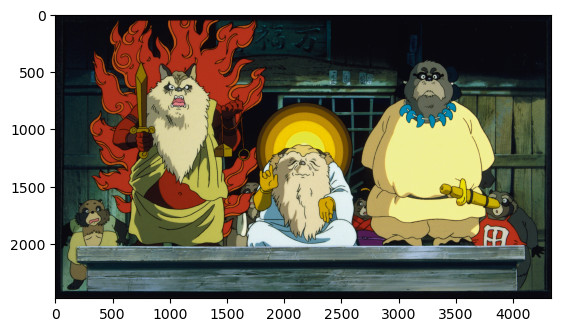

In [5]:
# Showing images used for the excercise
plt.imshow(pom_poko_1)
plt.show()

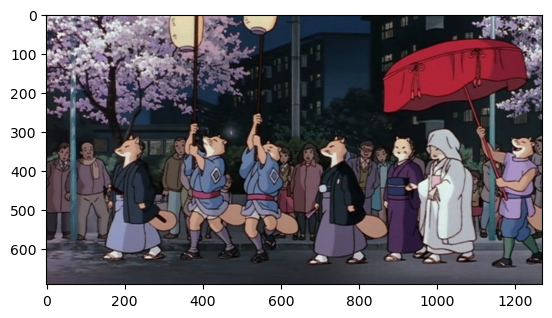

In [6]:
plt.imshow(pom_poko_2)
plt.show()

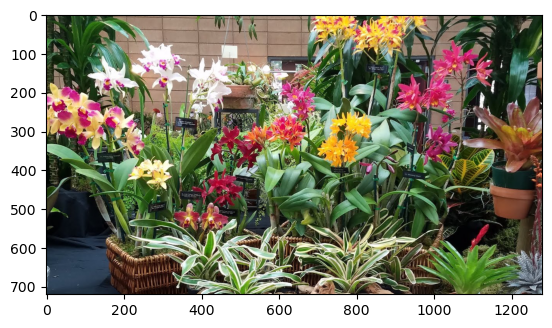

In [7]:
plt.imshow(orchids_1)
plt.show()

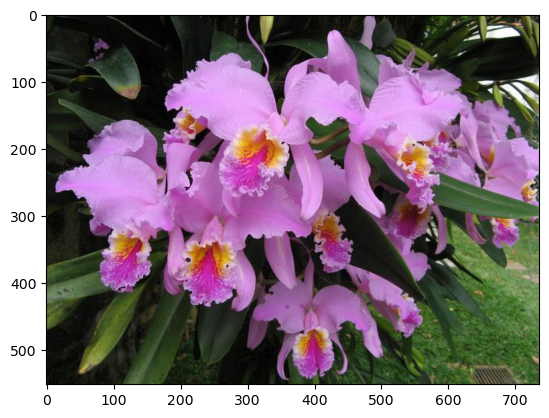

In [8]:
plt.imshow(orchids_2)
plt.show()

In [9]:
orchids_2.dtype

dtype('uint8')

**Programming 1** - Quantization with k-means

*Part (a)*

In [10]:
def quantizeRGB(origImg: npt.NDArray[np.uint8],k: int, use_sampling: bool = True) -> Tuple[npt.NDArray[np.uint8],np.ndarray]:
    """
    Takes an RGB image as imput, quantizes the three dimensional RGB space, and maps each pixel in 
    the imput image to its nearest k-means center
    
    Input:
        origImg, an image with dimmensions MxNx3 of data type uint8
        k, an interger, specifies the number of colors to quantize to
        use_sampling, a boolean if True it fits the k-means model using a sub-sample of the image. Defatult to True
    
    Output:
        outputImg, an image with dimmensions MxNx3 of data type uint8 
        meanColors, a kx3 array of the k centers
    
    Parameters
    ----------
    origImg : np.ndarray [shape=(M,N,3)]
    k: int
    
    Returns
    -------
    outputImg: np.ndarray [shape=(M,N,3)]
    meanColors: np.ndarray[shape=(k,3)]
    
    Throws
    ------
    Raises:AssertionError, if the number of channels in the origImg parameter does not equal 3
    Raises:AssertionError, if the data type in the array of the origImg parameter is not np.uint8
    Raises:AssertionError, if the data type of the parameter k is not int
    Raises:AssertionError, if the parameter k is not greater than 1
    
    Examples
    --------
    >>>
    >>>
    """
    assert origImg.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert origImg.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    assert type(k) == int, 'k should be an integer.'
    assert k > 1, 'The number of k-means centers has to be greater than 1.'
    
    img = origImg.astype(np.double) # Converts the image's default 8 bits integer coding into double data type
    
    w, h, d = tuple(img.shape) # Records the images shape
    image_array = np.reshape(img, (w * h, d)) # Transforms the image into a 2D array
    
    # K-Means model
    model = KMeans(n_clusters=k,  random_state=42) 
    
    if use_sampling:
        
        # The idea of using sampling to was adaptep from scikit-learn user's guide, available at:
        # https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py
        
        image_array_sample = shuffle(image_array, random_state=42, n_samples=1_000)

        print('Fitting the model using sampling...')
        kmeans = model.fit(image_array_sample)
        labels = kmeans.predict(image_array)

        print('Model fit completed...')
        meanColors = model.cluster_centers_

        outputImg = meanColors[labels].reshape(w, h, d).astype(np.uint8)
        
    else:
        
        print('Fitting the model without sampling...')
        labels = model.fit_predict(image_array)

        print('Model fit completed...')
        meanColors = model.cluster_centers_

        outputImg = meanColors[labels].reshape(w, h, d).astype(np.uint8)
    
    return outputImg, meanColors

In [11]:
test1,colors = quantizeRGB(pom_poko_1,4,False)

Fitting the model without sampling...
Model fit completed...


In [12]:
print(pom_poko_1.shape)
print(test1.shape)
print(colors.shape)

(2475, 4333, 3)
(2475, 4333, 3)
(4, 3)


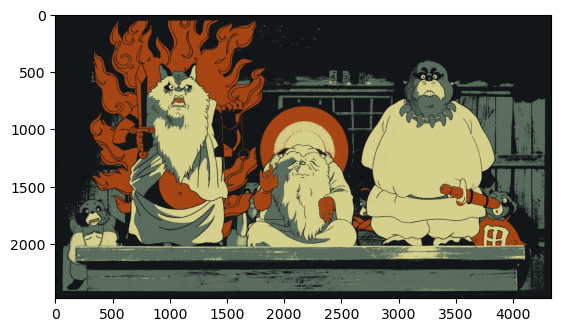

In [13]:
plt.imshow(test1)
plt.show()

In [14]:
test2,colors2 = quantizeRGB(pom_poko_1,4,True)

Fitting the model using sampling...
Model fit completed...


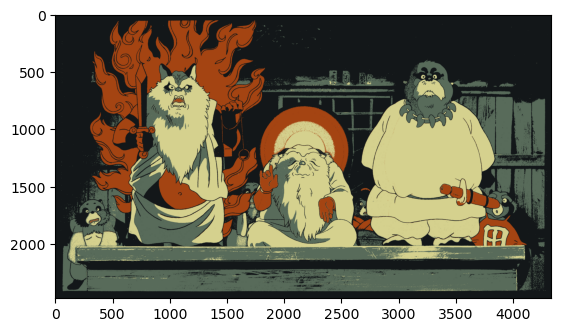

In [15]:
plt.imshow(test2)
plt.show()

In [16]:
test3,colors3 = quantizeRGB(pom_poko_1,8,True)

Fitting the model using sampling...
Model fit completed...


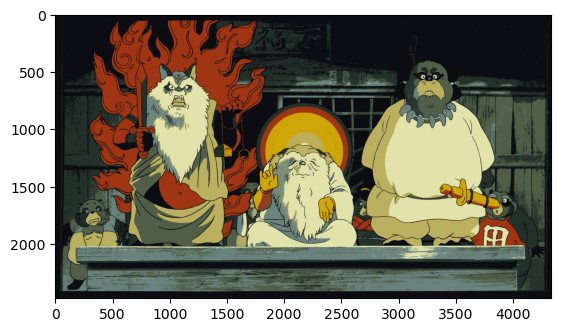

In [17]:
plt.imshow(test3)
plt.show()

In [18]:
colors3.shape

(8, 3)

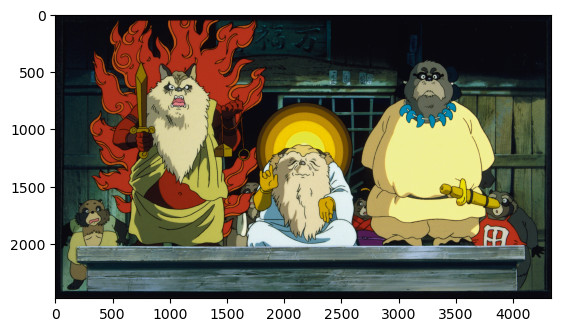

In [19]:
plt.imshow(pom_poko_1)
plt.show()

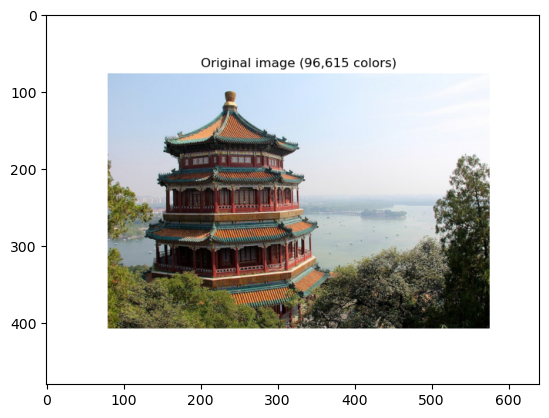

In [20]:
SUMMER_PALACE = '..\Zambrano_Ricardo_ASN3_py\summer_palace.png'
summer_palace = io.imread(SUMMER_PALACE)
plt.imshow(summer_palace)
plt.show()

Fitting the model using sampling...
Model fit completed...


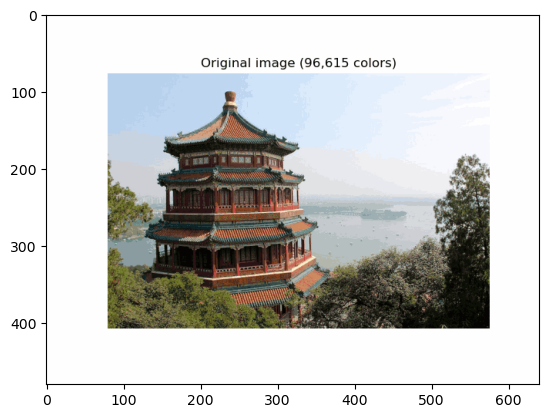

In [21]:
test4,colors4 = quantizeRGB(summer_palace,64,True)
plt.imshow(test4)
plt.show()

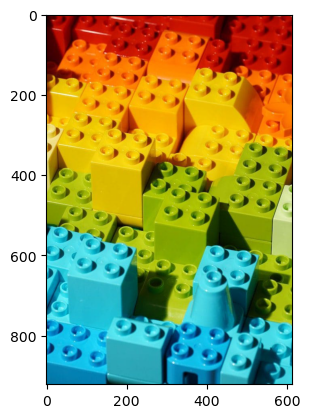

In [22]:
LEGOS = '..\Zambrano_Ricardo_ASN3_py\legos.jpg'
legos = io.imread(LEGOS)
plt.imshow(legos)
plt.show()

Fitting the model using sampling...
Model fit completed...


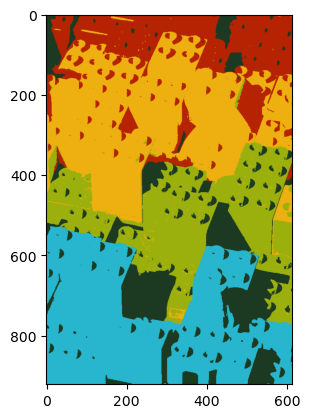

In [23]:
test5,colors5 = quantizeRGB(legos,5,True)
plt.imshow(test5)
plt.show()

Fitting the model using sampling...
Model fit completed...


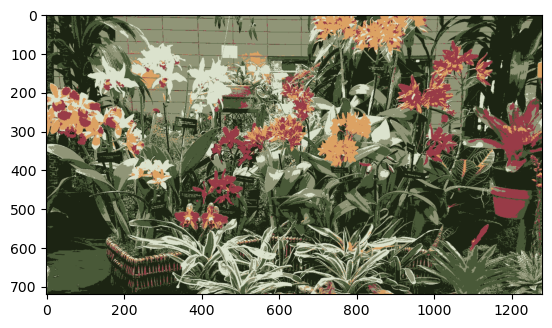

In [24]:
test6,colors6 = quantizeRGB(orchids_1,6,True)
plt.imshow(test6)
plt.show()

Fitting the model using sampling...
Model fit completed...


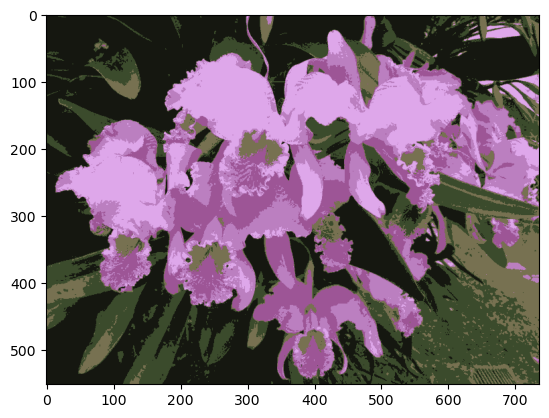

In [25]:
test7,colors7 = quantizeRGB(orchids_2,6,True)
plt.imshow(test7)
plt.show()

*Part (b)*

In [26]:
def quantizeHSV(origImg: npt.NDArray[np.uint8],k: int, use_sampling: bool = True) -> Tuple[npt.NDArray[np.uint8],np.ndarray]:
    """
    Takes an RGB image as imput, converts it to HSV and then quantizes the one dimensional hue space, 
    Next it maps each pixel in the input image to its nearest quantized hue value while keeping its saturation
    and value channelsthe same as the input. Finally it converts the image back to RGB
    
    Input:
        origImg, an image with dimmensions MxNx3 of data type uint8
        k, an interger, specifies the number of colors to quantize to
        use_sampling, a boolean if True it fits the k-means model using a sub-sample of the image. Defatult to True
    
    Output:
        outputImg, an image with dimmensions MxNx3 of data type uint8 
        meanHues, a kx1 array of the k hue centers
    
    Parameters
    ----------
    origImg : np.ndarray [shape=(M,N,3)]
    k: int
    
    Returns
    -------
    outputImg: np.ndarray [shape=(M,N,3)]
    meanHues: np.ndarray[shape=(k,1)]
    
    Throws
    ------
    Raises:AssertionError, if the number of channels in the origImg parameter does not equal 3
    Raises:AssertionError, if the data type in the array of the origImg parameter is not np.uint8
    Raises:AssertionError, if the data type of the parameter k is not int
    Raises:AssertionError, if the parameter k is not greater than 1
    
    Examples
    --------
    >>>
    >>>
    """
    assert origImg.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert origImg.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    assert type(k) == int, 'k should be an integer.'
    assert k > 1, 'The number of k-means centers has to be greater than 1.'
    
    hsv_img = rgb2hsv(origImg) # Converts he original image from RGB to HSV
    
    w, h, _ = tuple(hsv_img.shape) # Records the images shape
    d = 1 # The image has 3 channels, however, the k-mean centers will be calculated only in the 1-d hue channel. This is why d=1
    
    # Separate the channels to isolate them
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:, :, 1]
    value_img = hsv_img[:, :, 2]
    
    image_array = np.reshape(hue_img, (w * h, d)) # Reshapes the image to be processed by k-means function
    
    # K-Means model
    model = KMeans(n_clusters=k,  random_state=42) 
    
    if use_sampling:
        
        # The idea of using sampling to was adaptep from scikit-learn user's guide, available at:
        # https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py
        
        image_array_sample = shuffle(image_array, random_state=42, n_samples=1_000)

        print('Fitting the model using sampling...')
        kmeans = model.fit(image_array_sample)
        labels = kmeans.predict(image_array)

        print('Model fit completed...')
        meanHues = model.cluster_centers_

        outputHue = meanHues[labels].reshape(w, h)
        
        outputImg = np.stack((outputHue, saturation_img, value_img), axis=2)
        outputImg = hsv2rgb(outputImg)
        outputImg = outputImg*255
        outputImg = outputImg.astype(np.uint8)
        
    else:
        
        print('Fitting the model without sampling...')
        labels = model.fit_predict(image_array)

        print('Model fit completed...')
        meanHues = model.cluster_centers_

        outputHue = meanHues[labels].reshape(w, h)   
        
        outputImg = np.stack((outputHue, saturation_img, value_img), axis=2)
        outputImg = hsv2rgb(outputImg)
        outputImg = outputImg*255
        outputImg = outputImg.astype(np.uint8)
    
    return outputImg, meanHues

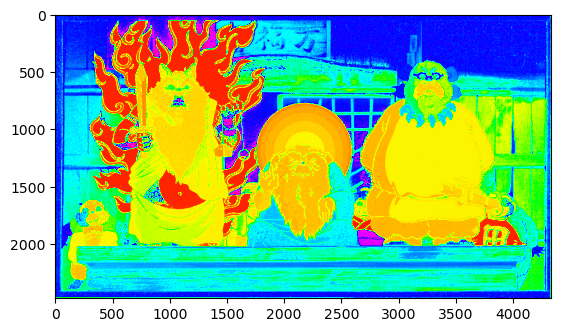

In [27]:
hsv_img = rgb2hsv(pom_poko_1)
hue_img = hsv_img[:, :, 0]
saturation_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]
plt.imshow(hue_img, cmap='hsv')
plt.show()

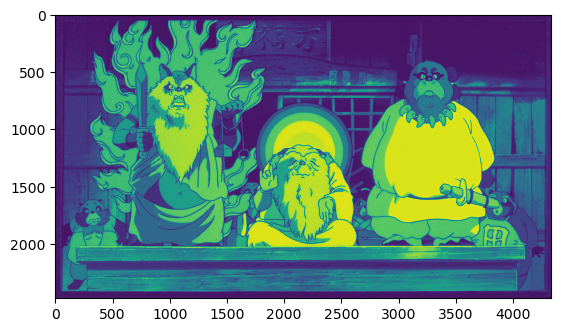

In [28]:
plt.imshow(value_img)
plt.show()

In [29]:
hsv_img.shape

(2475, 4333, 3)

In [30]:
hue_img.shape

(2475, 4333)

In [31]:
2475*4333

10724175

In [32]:
hue_img.dtype

dtype('float64')

In [33]:
hue_img[0:2,]

array([[0.02777778, 0.04545455, 0.11111111, ..., 0.02564103, 0.01111111,
        0.05882353],
       [0.02564103, 0.04545455, 0.03333333, ..., 0.03333333, 0.98333333,
        0.02777778]])

In [34]:
w, h = tuple(hue_img.shape)
image_array = np.reshape(hue_img, (w * h, 1))

In [35]:
image_array.shape

(10724175, 1)

In [36]:
image_array[0:2,]

array([[0.02777778],
       [0.04545455]])

In [37]:
model = KMeans(n_clusters=3,  random_state=42) 

In [38]:
image_array_sample = shuffle(image_array, random_state=42, n_samples=1_000)

kmeans = model.fit(image_array_sample)
labels = kmeans.predict(image_array)

meanHues = model.cluster_centers_

In [39]:
labels.shape

(10724175,)

In [41]:
meanHues

array([[0.13171662],
       [0.47955842],
       [0.69081232]])

In [42]:
outputHue = meanHues[labels].reshape(w, h)

In [43]:
outputHue.shape

(2475, 4333)

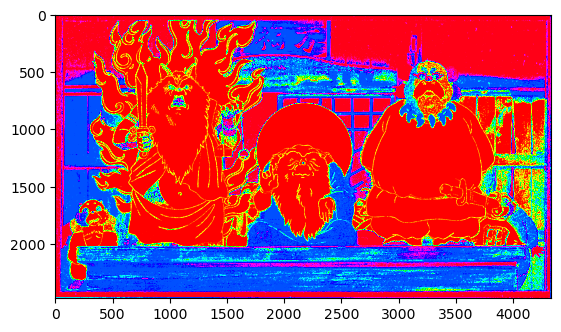

In [44]:
plt.imshow(outputHue, cmap='hsv')
plt.show()

In [45]:
outputImg = np.stack((outputHue, saturation_img, value_img), axis=2)

In [46]:
outputImg[:,:,0]==outputHue

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [47]:
outputImg = hsv2rgb(outputImg)

In [48]:
outputImg.dtype

dtype('float64')

In [49]:
outputImg = outputImg*255
outputImg = outputImg.astype(np.uint8)

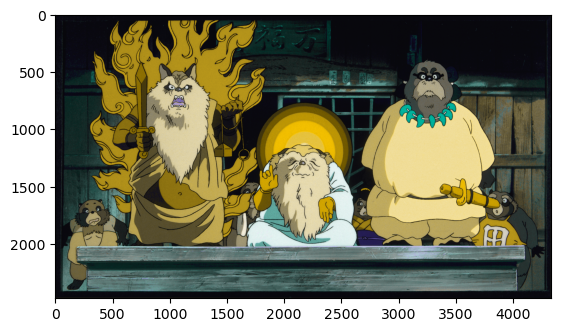

In [50]:
plt.imshow(outputImg)
plt.show()

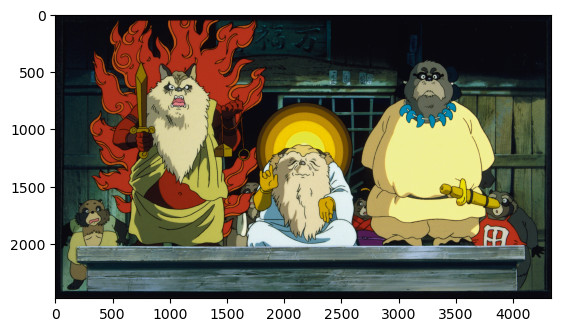

In [51]:
plt.imshow(pom_poko_1)
plt.show()

Fitting the model using sampling...
Model fit completed...


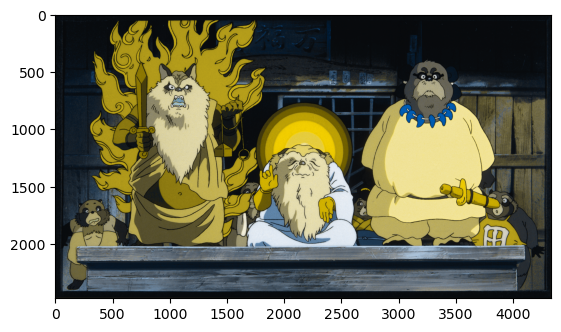

In [52]:
b, col_cent = quantizeHSV(pom_poko_1,2)
plt.imshow(b)
plt.show()

Fitting the model using sampling...
Model fit completed...


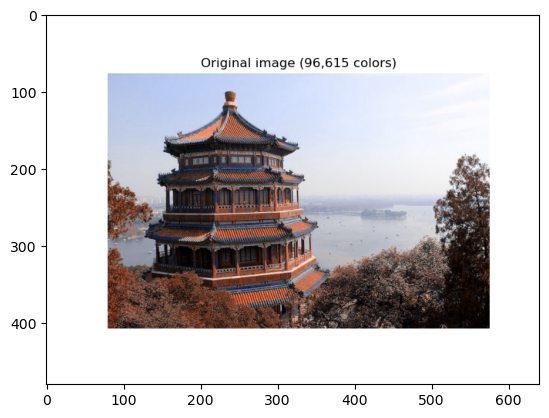

In [53]:
c, col_cent_2 = quantizeHSV(summer_palace,2)
plt.imshow(c)
plt.show()

*Part (c)*

In [54]:
def computeQuantizationError(origImg: npt.NDArray[np.uint8],quantizedImg: npt.NDArray[np.uint8])-> float:
    """
    Computes the sum of squared error (SSD error) between the pixel values of an RGB image and the pixel values of a 
    quantized version of the image.
    
    Input:
        origImg, an image with dimmensions MxNx3 of data type uint8
        quantizedImg, an image with dimmensions MxNx3 of data type uint8. It is assumed this image is a quantized version
        of origImg
    
    Output:
        error, sum of squared error, a float
        
    Parameters
    ----------
    origImg : np.ndarray [shape=(M,N,3)]
    quantizedImg: np.ndarray [shape=(M,N,3)]
    
    Returns
    -------
    error: float
    
    Throws
    ------
    Raises:AssertionError, if the number of channels in the origImg or quantizedImg parameters do not equal 3
    Raises:AssertionError, if the data type in the array of the origImg or quantizedImg parameters are not np.uint8
    Raises:AssertionError, if the images dimensions do not match
    
    Examples
    --------
    >>>
    >>>
    """
    assert origImg.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert origImg.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    assert quantizedImg.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert quantizedImg.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'    
    
    w, h, d = tuple(origImg.shape) # Records the images shape
    x, y, z = tuple(quantizedImg.shape) # Records the images shape
    
    assert (w==x) and (h==y) and (d==z), 'The images must have the same size.'
    
    img = origImg.astype(np.double) # Converts the image's default 8 bits integer coding into double data type
    qimg = quantizedImg.astype(np.double) # Converts the image's default 8 bits integer coding into double data type
    
    error = np.sum((img - qimg) ** 2)
    
    return error

In [55]:
w, h, d = pom_poko_1.shape
x, y, z = b.shape

In [56]:
(w==x) and (h==y) and (d==z)

True

In [57]:
zz= np.arange(12).reshape((2,2,3))
zz

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [58]:
xx = np.arange(12,24).reshape((2,2,3))
xx

array([[[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [59]:
err = np.sum((zz - xx) ** 2)
err

1728

In [60]:
err/(2*2*3)

144.0

In [61]:
err2 = 0
for k in range(3):
    print('channel',k)
    for i in range(2):
        for j in range(2):
            diff = zz[i,j,k]-xx[i,j,k]
            diff_sq = diff*diff
            err2 = err2 + diff_sq

err2

channel 0
channel 1
channel 2


1728

In [62]:
computeQuantizationError(zz.astype(np.uint8),xx.astype(np.uint8))

1728.0

In [63]:
computeQuantizationError(pom_poko_1,b)

10922020303.0

In [64]:
computeQuantizationError(pom_poko_1,test2)

21687340903.0

In [65]:
21687340903.0>10922020303.0

True

*Part (d)*

In [87]:
def getHueHists(im: npt.NDArray[np.uint8], k: int)-> Tuple[matplotlib.figure.Figure,matplotlib.figure.Figure]:
    """
    Computes and display two histograms of the hue values of the input image. The first histogram uses 
    equally-spaced bins (uniformly dividing up the hue values). The second histogram use bins defined 
    by the k cluster center memberships.
    
    Input:
        im, a matrix with dimmensions MxNx3 of data type uint8 that represents an image
        k, an interger, specifies the number of colors to quantize to
    
    Output:
        histEqual, a histogram that uses equally-spaced bins (uniformly dividing up the hue values)
        histclustered, a  histogram that uses bins defined by the k cluster center memberships 
        (ie., all pixels belonging to hue cluster i go to the i-th bin, for i=1,...k)
    
    Parameters
    ----------
    im : np.ndarray [shape=(M,N,3)]
    k: int
    
    Returns
    -------
    histEqual: matplotlib.figure
    histclustered: matplotlib.figure
    
    Throws
    ------
    Raises:AssertionError, if the number of channels in im parameter does not equal 3
    Raises:AssertionError, if the data type in the array of the im parameter is not np.uint8
    Raises:TypeError, is k is not of type int and the provided parameter's type cannot be casted into int 
    
    Examples
    --------
    >>>
    >>>
    """
    assert im.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert im.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    if type(k) != int:
        print("Converting parameter k into integer type...")
        try:
            k = int(k)
        except:
            print("Unexpected data type on parameter k. Please provide a valid data type, in this case integer...")
            print("... Cannot run getHueHists(). Try again!")
            return -1
    
    hsv_img = rgb2hsv(im) # Converts he original image from RGB to HSV
    hue_img = hsv_img[:, :, 0] # Extracts the hue layer from the original image
    
    quantized_im, k_centers = quantizeHSV(origImg = im, k = k)
    
    histEqual = plt.figure()
    plt.hist(hue_img.ravel(), 36)
    plt.title("Histogram of the Hue channel")
    
    hsv_q_img = rgb2hsv(quantized_im)
    hue_q_img = hsv_q_img[:, :, 0]
    
    histclustered = plt.figure()
    plt.hist(hue_q_img.ravel(), 36)
    plt.title("Histogram of the Hue channel of Quantized Image")
    
    return histEqual, histclustered

In [67]:
q_im, k_cent = quantizeHSV(pom_poko_1,4)

Fitting the model using sampling...
Model fit completed...


In [68]:
hsv_im = rgb2hsv(pom_poko_1)
hue_im = hsv_im[:, :, 0]

C:\Users\rzamb\anaconda3\envs\msml640\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


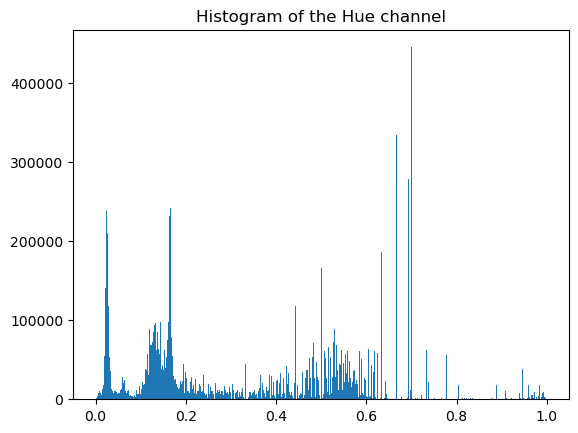

In [78]:
fig1 = plt.figure()
plt.hist(hue_im.ravel(), 512)
plt.title("Histogram of the Hue channel")
fig1.show()

In [70]:
hist_o, bin_ed = np.histogram(hue_im, bins=512, range=(0,1))

In [71]:
print(hist_o.shape)
print(bin_ed.shape)

(512,)
(513,)


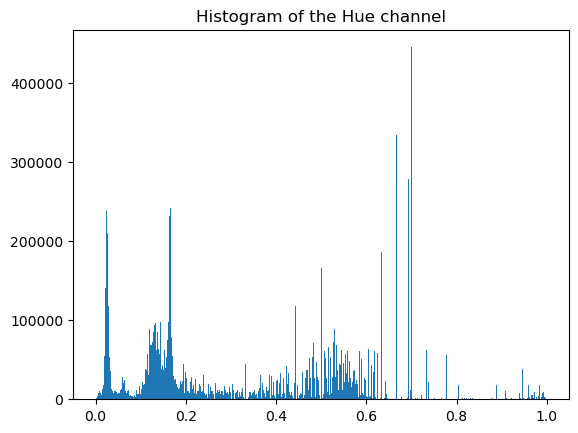

In [72]:
# Creating plot
# fig = plt.figure(figsize =(10, 7))
 
plt.hist(hue_im.ravel(), bins = 512) 
 
plt.title("Histogram of the Hue channel in Orignal Image") 
 
# show plot
plt.show()

In [75]:
hsv_q_im = rgb2hsv(q_im)
hue_q_im = hsv_q_im[:, :, 0]

C:\Users\rzamb\anaconda3\envs\msml640\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


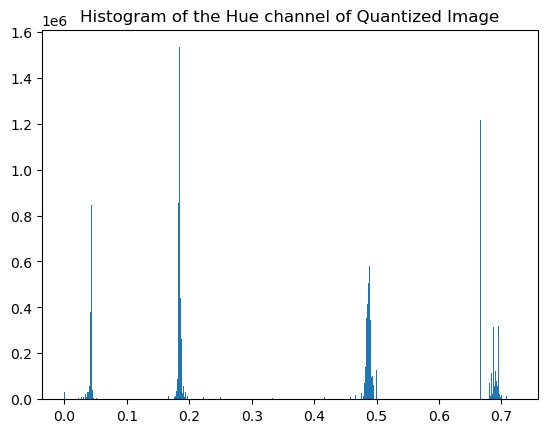

In [79]:
fig2 = plt.figure()
plt.hist(hue_q_im.ravel(), 512)
plt.title("Histogram of the Hue channel of Quantized Image")
fig2.show()

In [80]:
k_cent

array([[0.69340728],
       [0.04283101],
       [0.48980399],
       [0.1829398 ]])

Fitting the model using sampling...
Model fit completed...


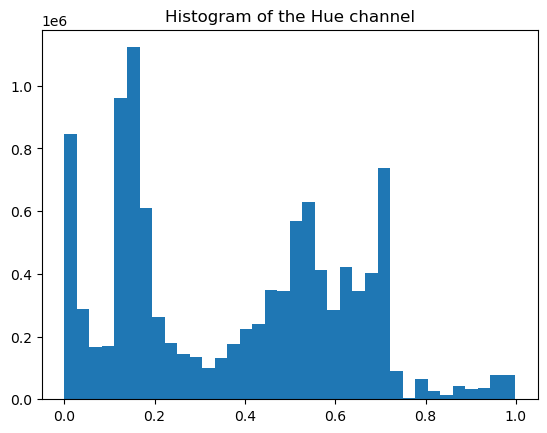

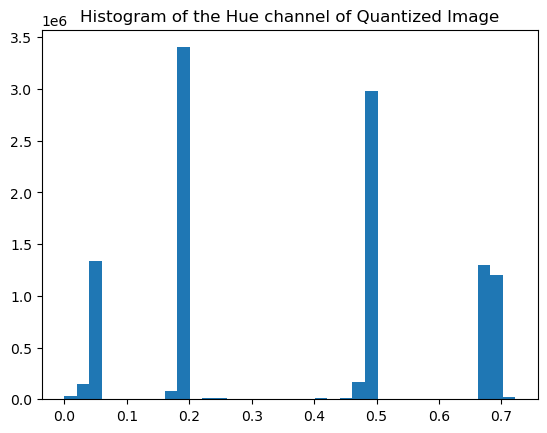

In [123]:
figA, figB = getHueHists(pom_poko_1,4)